### задача 1

In [9]:
import numpy as np
import pandas as pd

In [10]:
from sklearn.datasets import load_boston

In [11]:
boston = load_boston()

In [12]:
target = boston.target

In [13]:
feature_names = boston.feature_names

In [14]:
for line in boston.DESCR.split('\n'):
    print(line)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [15]:
data = boston.data

In [16]:
X = pd.DataFrame(data, columns = feature_names)

In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
y = pd.DataFrame(target, columns = ['Price'])

In [19]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 30, random_state = 42)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
y_pred = lr.predict(X_test)

In [26]:
check_test = pd.DataFrame({'y_test' : y_test['Price'],
                          'y_pred' : y_pred.flatten()},
                          columns = ['y_test' , 'y_pred'])

In [27]:
check_test.head()

,y_test,y_pred
173,23.6,29.219199
274,32.4,36.309599
491,13.6,14.036162
72,22.8,24.768291
452,16.1,18.712897


In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test, y_pred)

0.764673419528248

### задача 2

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)

In [32]:
?RandomForestRegressor

In [33]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [34]:
y_pred = model.predict(X_test)

In [35]:
r2_score(y_test, y_pred)

0.9345662125135294

Точность предсказаний гораздо выше у второй модели

### задача 3

In [60]:
importance = model.feature_importances_

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
importance_name = pd.Series(importance, index = feature_names)

CRIM       0.034287
ZN         0.000955
INDUS      0.006277
CHAS       0.000751
NOX        0.022824
RM         0.432451
AGE        0.013360
DIS        0.069431
RAD        0.004010
TAX        0.015469
PTRATIO    0.017001
B          0.012181
LSTAT      0.371002
dtype: float64

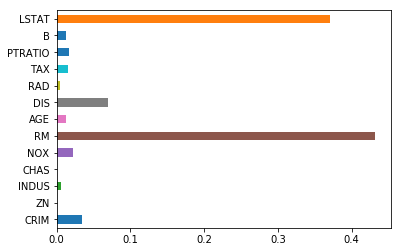

In [70]:
importance_name.plot(kind ='barh')

два самых важных признака - LSTAT и RM